# Exercise: Clustering Pokemon

![squirtle](https://media3.giphy.com/media/QzxONYL3xbj6E/giphy.gif "segment")

The goal of this exercise is to gain some hands on experience with clustering implementation and the thought process behind unsupervised learning :)

We will explore our dataset, complete some pre-processing steps, and create K-Means and Agglomerative Clustering models.

Follow along and be sure to answer all the questions <font color="red">highlighted in red</font>

## Data

https://www.kaggle.com/abcsds/pokemon

## Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

## Read Data

In [4]:
##Remember to change the path name to where you have place the csv!
df = pd.read_csv("datasets/Pokemon.csv")

In [7]:
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [9]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## Initial Data Understanding

What relationships exist between features?

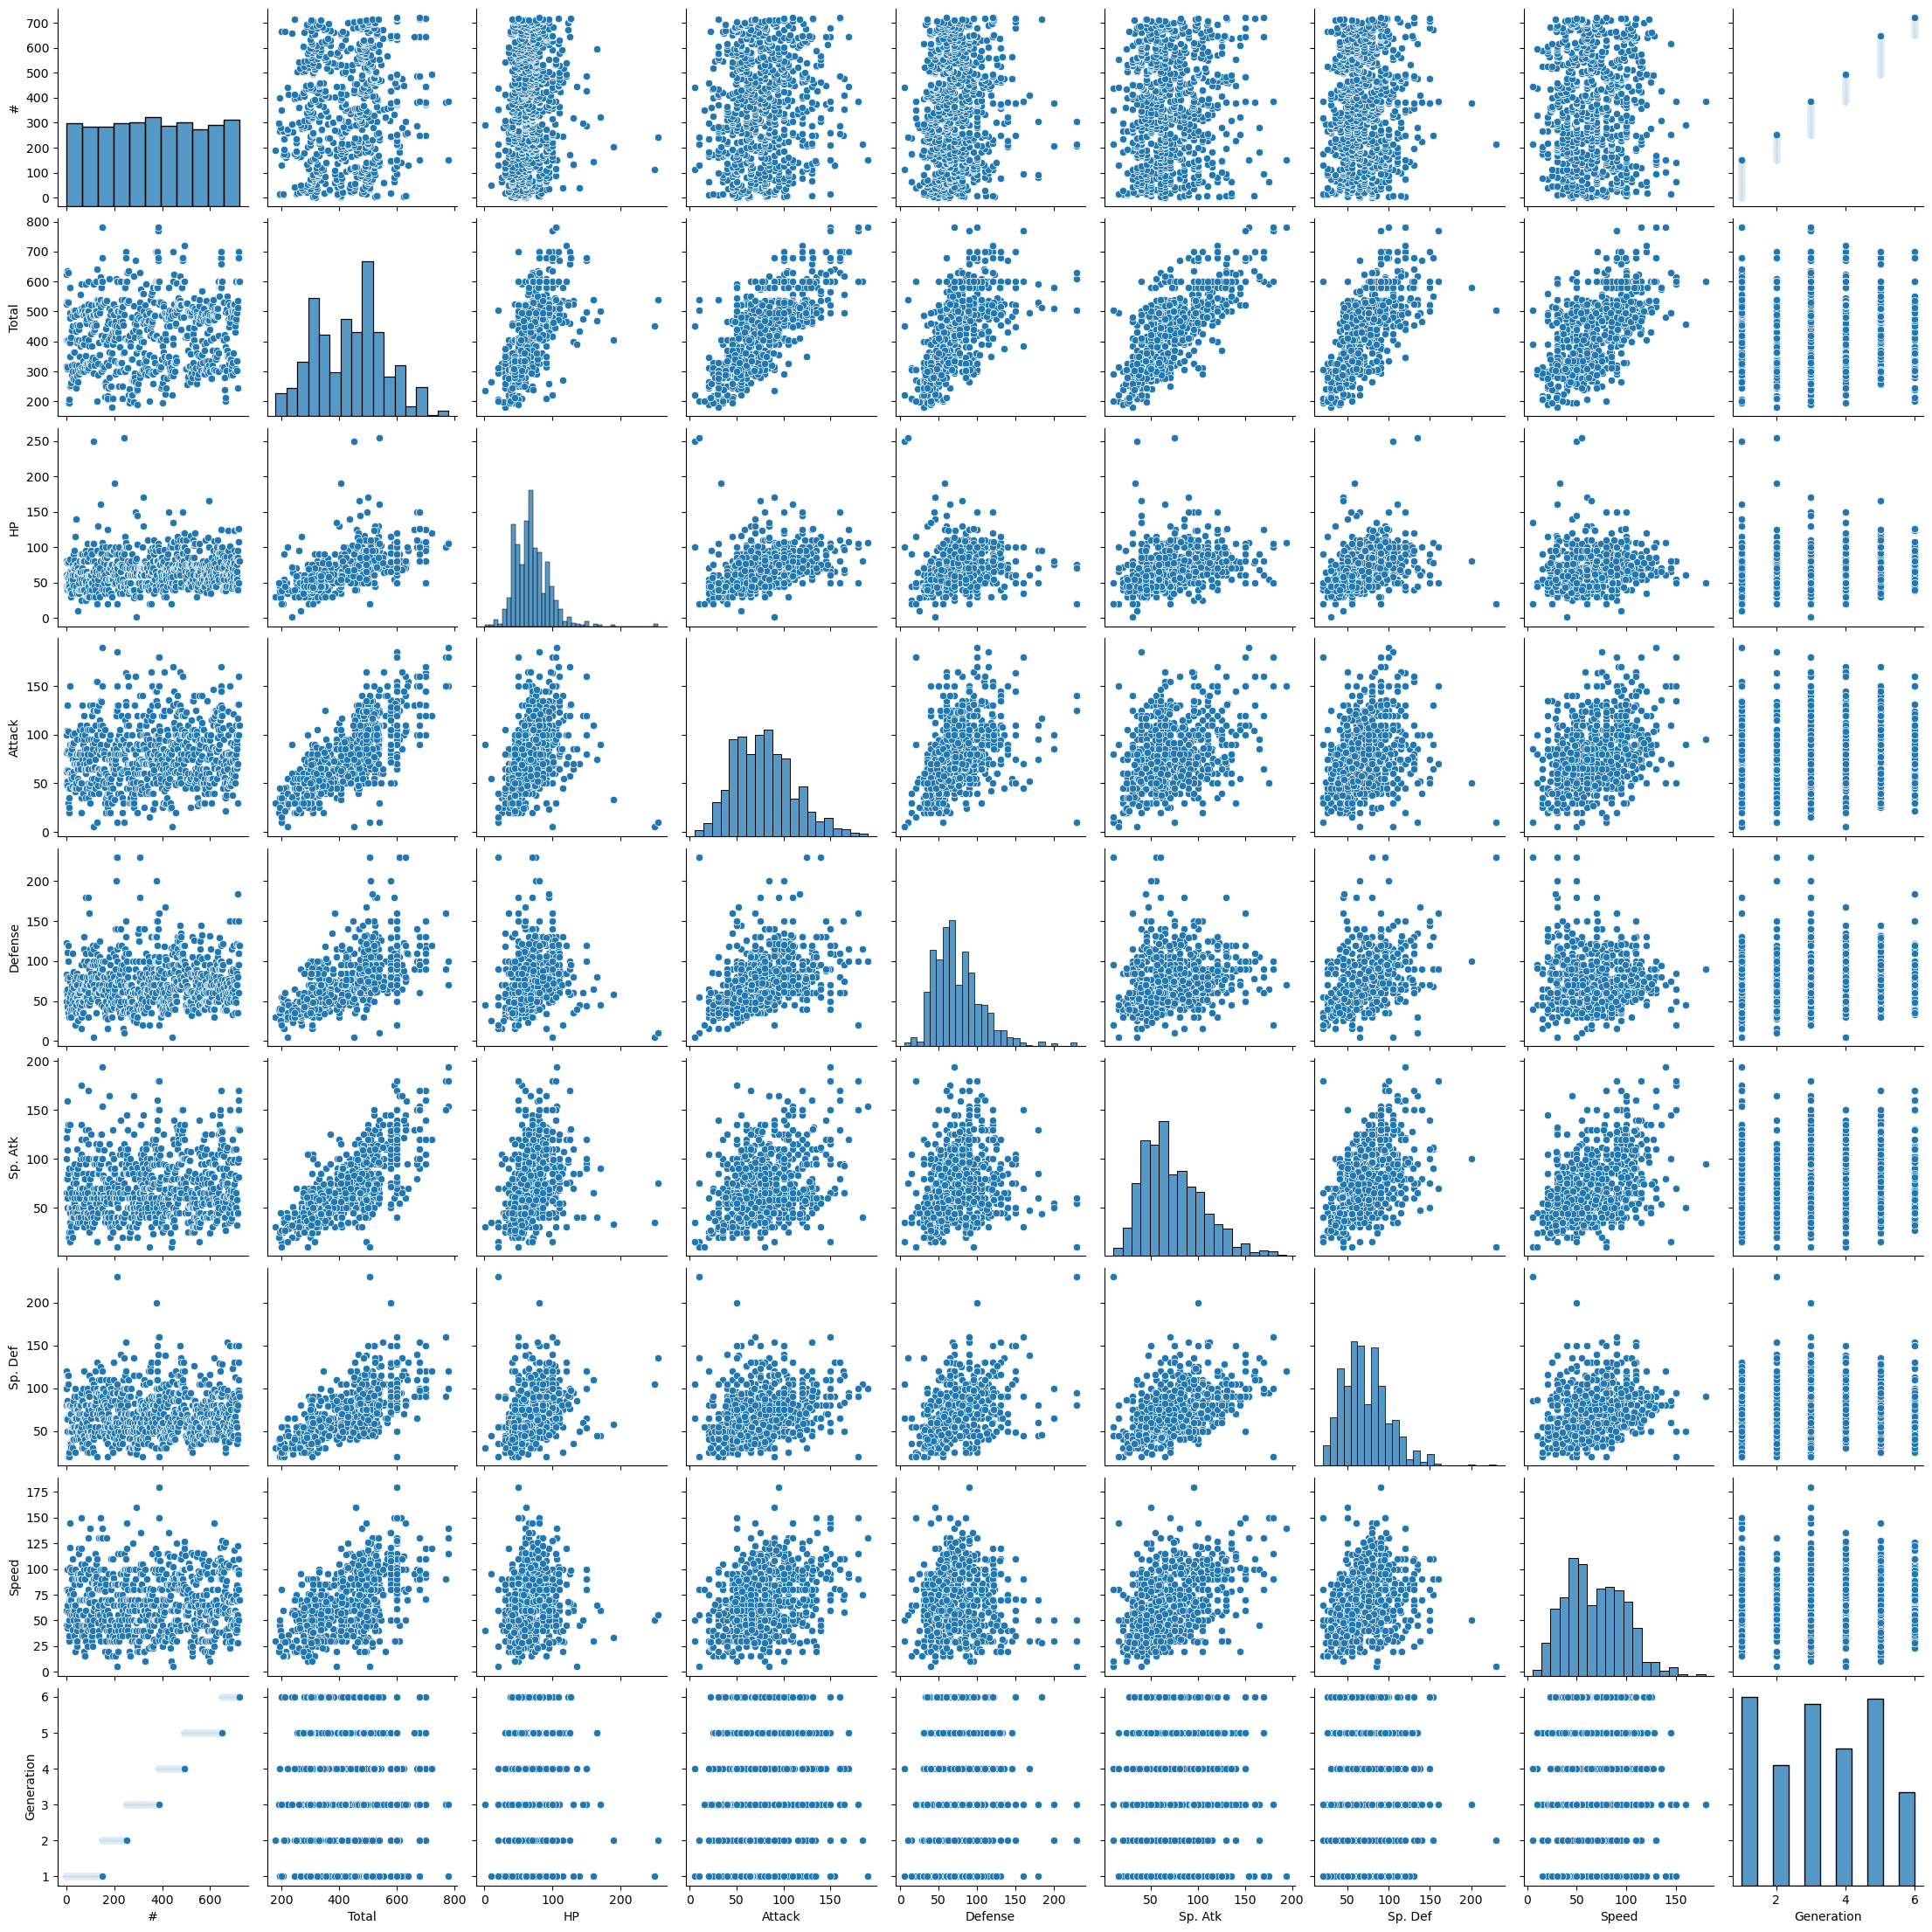

In [13]:
sns.pairplot(df.drop(['Legendary'], axis=1))

<Axes: xlabel='Attack', ylabel='Speed'>

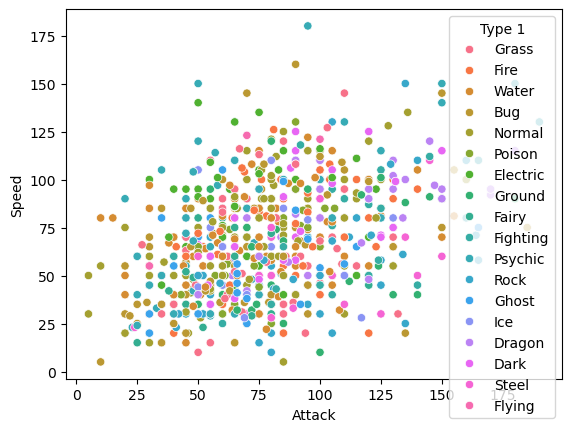

In [14]:
sns.scatterplot(x='Attack', y='Speed', hue='Type 1', data=df)

<Axes: xlabel='Attack', ylabel='Speed'>

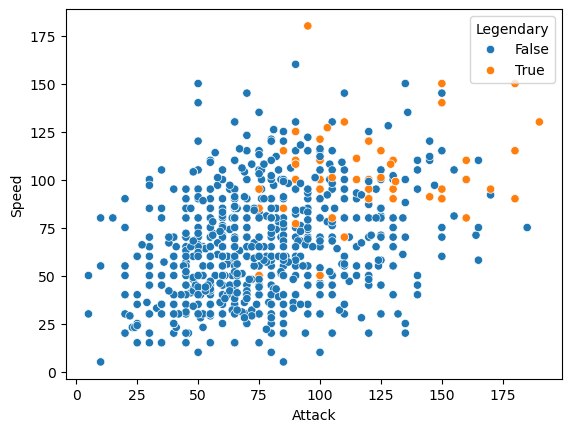

In [15]:
sns.scatterplot(x='Attack', y='Speed', hue='Legendary', data=df)

Correlations -- many things correlate with "total," which makes sense since that is just the sum of all the stats

<Axes: >

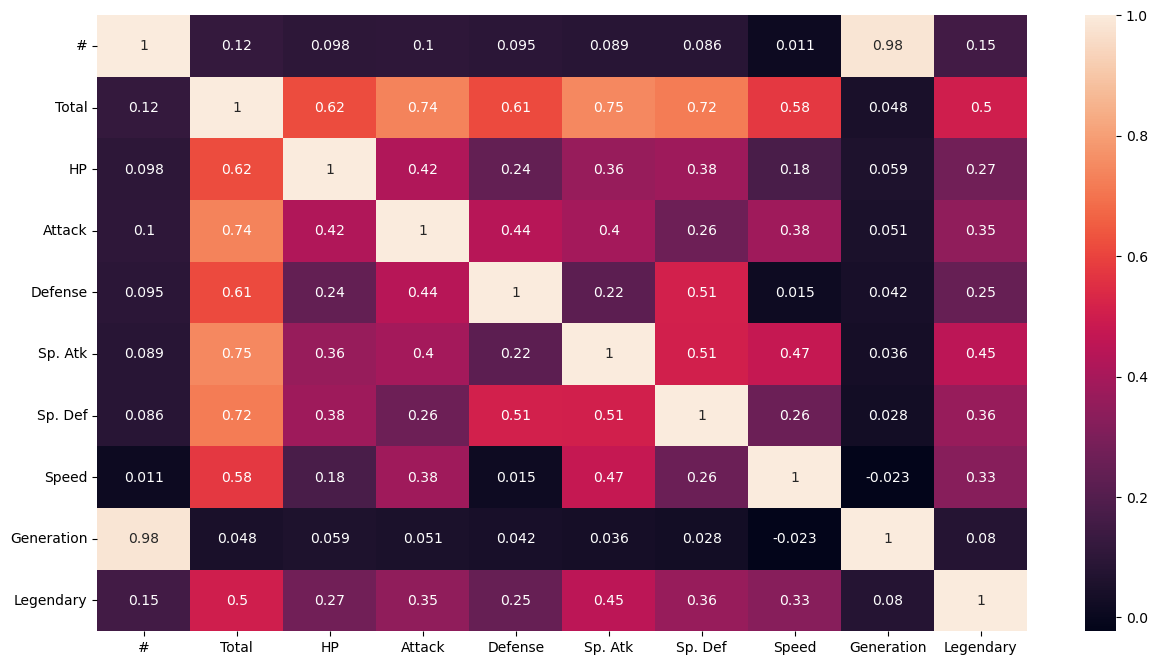

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only= True),annot = True)
## or you can drop the non-numeric columns instead of setting numerically_only to True
## sns.heatmap(df.drop["Name","Type 1","Type 2"].corr(),annot = True)

<font color="red">What have you learned about the data from the initial visualization process?</font>

feel free to create your own visualizations as well!

So certain stats, like ATTACK, Sp. ATK, and Sp.Def, have more of an influence on the overall total, and legendary status correlates moderately with having higher values across some stats.

## Explore Visualization using PCA

<font color="red">Briefly explain what PCA is on a high-level.</font>

Principal component analysis (PCA) reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components.

In [38]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Make a dictionary for converting the type columns (and also knowing which values relate to what type when we come to look at it again later).

In [41]:
types = {'Grass':0, 'Fire':3, 'Water':4, 'Bug':5, 'Normal':6, 'Poison':7, 'Electric':8,
       'Ground':9, 'Fairy':10, 'Fighting':11, 'Psychic':12, 'Rock':13, 'Ghost':14, 'Ice':15,
       'Dragon':16, 'Dark':17, 'Steel':18, 'Flying':19}

In [43]:
df['Type 1'] = df['Type 1'].replace(types)

C:\Users\jandr\AppData\Local\Temp\ipykernel_4288\122377318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type 1'] = df['Type 1'].replace(types)


In [45]:
df['Type 2'] = df['Type 2'].replace(types)

C:\Users\jandr\AppData\Local\Temp\ipykernel_4288\3421794385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type 2'] = df['Type 2'].replace(types)


In [47]:
df.loc[:, 'Type 2'] = df['Type 2'].fillna(-1)

In [49]:
#Let's only use the basic stats as X data.
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

In [51]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

Once we have our PCA dataframe, we can start manually exploring where clusters may exists through visualizations.

There's no obvious visual clusters from the initial PCA.

<Axes: xlabel='0', ylabel='1'>

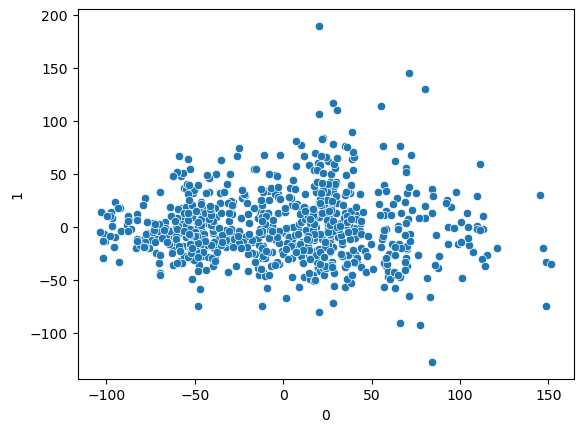

In [55]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

We can see that the legendary ones seem to typically fall closer to the right (but it still isn't clear cut).

<Axes: xlabel='0', ylabel='1'>

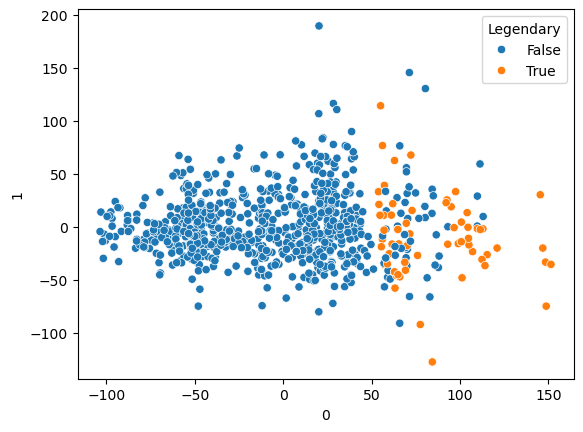

In [58]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.Legendary)

Type 1 also doesn't seem to be relevant.

<Axes: xlabel='0', ylabel='1'>

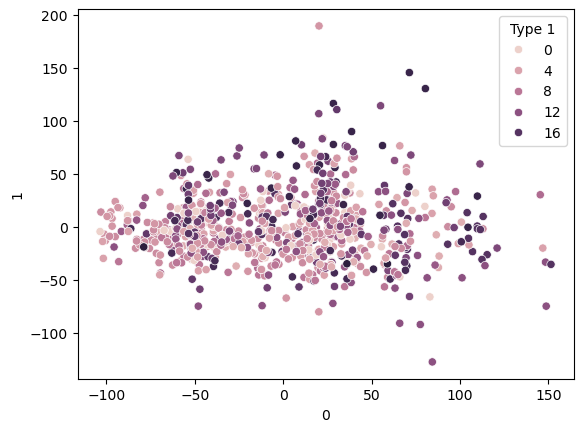

In [61]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Type 1'])

<Axes: xlabel='0', ylabel='1'>

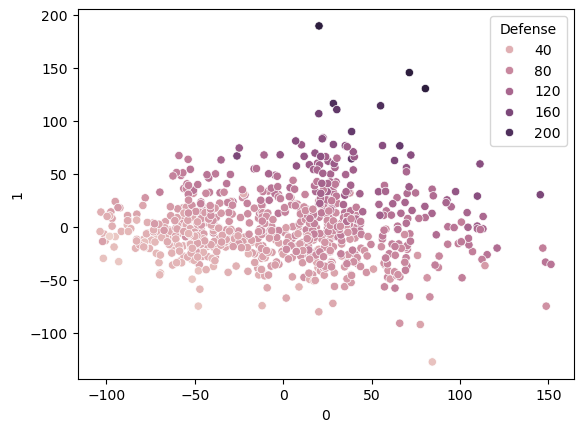

In [62]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Defense'])

<Axes: xlabel='0', ylabel='1'>

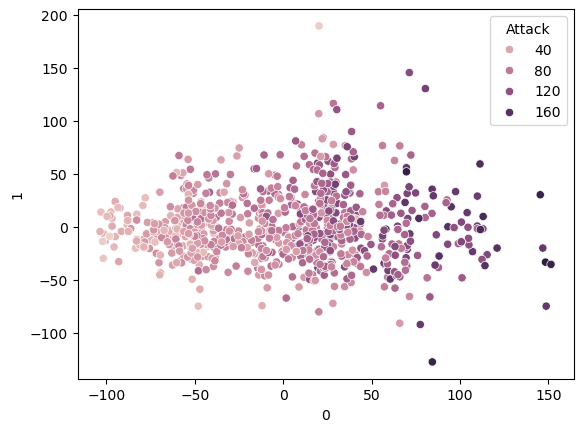

In [65]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Attack'])

<font color="red">What advantages do the PCA visualizations have over the original dataframe? (Why do we do this?)</font>


PCA, or Principal Component Analysis, helps us make sense of complex data by simplifying it. Imagine you have a lot of features (like different stats for Pokémon), and it’s hard to see patterns because there’s too much information. PCA reduces these features to just a couple of main components that capture most of the important information. This makes it easier to spot patterns, like groups or trends, by creating simpler visuals like 2D or 3D plots. It also removes unnecessary details (or noise) and makes the data easier and faster to work with, which helps us build better models and understand the data more clearly.

<hr>

## K-Means Clustering

We will begin our modeling with K-Means Clustering.

<font color = "red">Briefly explain how the K-Means clustering model works.</font>

K-Means clustering is a way to group data points that are similar to each other. First, you pick how many groups clusters you want. The model then randomly picks points to be the "center" of each group. Next, it assigns each data point to the nearest center, making initial groups. Then, it moves the centers to the middle of their groups and repeats the process until the groups stay the same. In the end, you get clusters of data points that are close to each other, which helps us see patterns or similarities

Remember how we determine the best number of clusters (if we can't just manually look at it and decide)?  
  
We look at the variance -- or, the sum of squared distances between the observations and their centroids.
Note: "inertia" is the "within-cluster sum-of-squares criterion." See [scikit learn documentation](https://scikit-learn.org/stable/modules/clustering.html).

In [74]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Here, we see that the variance decreases significantly until 2, and then starts to decrease at a slower rate afterwards. Therefore, 2 is our preferred number of clusters.

Text(0, 0.5, 'Variance')

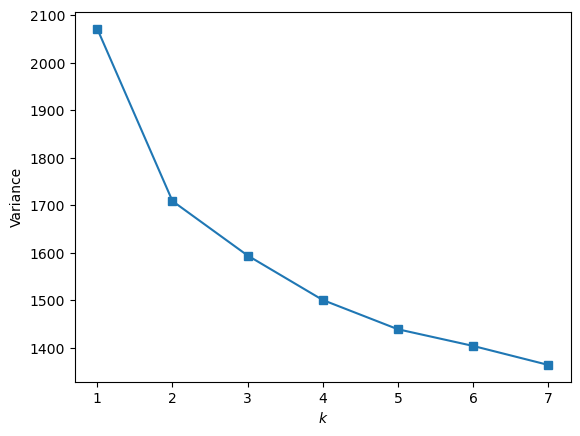

In [76]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

<font color = "red"> In this case, what is the optimal number of clusters and why?</font>

The best number of clusters here is 2. We choose 2 because when we look at how spread out the points are from their group centers called variance or inertia, it drops a lot up to 2 clusters, then doesn’t drop as much after that. This big drop at 2 clusters is called the "elbow" point, and it usually tells us the best number of clusters to pick. Adding more than 2 clusters doesn’t make the groups much tighter, so 2 clusters is the simplest and best choice.

In [81]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Now that we have fit our k-means clusters, let's just find what value (0 or 1, since we have set K=2) each row of data is so we can visualize it.

In [84]:
y = kmeans.fit_predict(X)

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


We are reusing the PCA (dimensionality reduction) data frame for the sake of visualizing 2-dimensional data (rather than 5).

<Axes: xlabel='0', ylabel='1'>

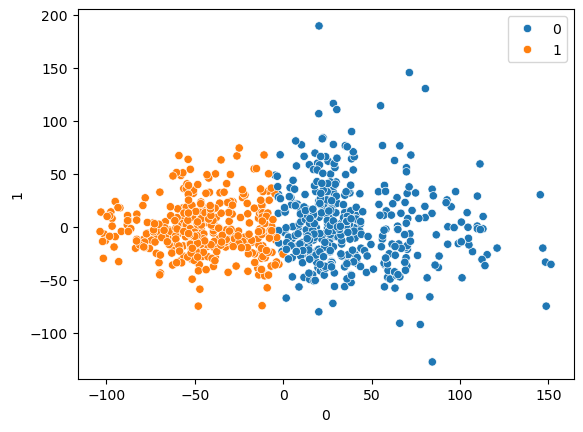

In [87]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

We could also try plotting individual features to take a look.

<Axes: xlabel='Attack', ylabel='Defense'>

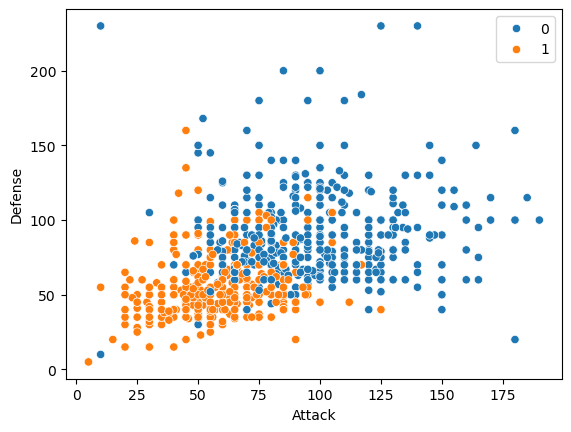

In [90]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y)

<font color = "red">What do these clusters potentially represent? What separates the two clusters?</font>

The two clusters probably represent two different groups in the data that have something in common. Since we're looking at features like "Attack" and "Defense" to visualize these groups, one cluster might be for data points (like Pokémon) with higher Attack values, while the other might be for those with higher Defense values or a mix of both.

In simple terms, what separates the two clusters are the differences in stats like Attack and Defense—one group might be stronger in attacking, and the other might be better at defending, making them stand out as two separate groups.

Let's add our clusters back to the original DataFrame so we can take a look at some of the items.  

In [95]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [97]:
new_df

#                   Name  Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur       0     7.0    318  45      49       49   
1      2                Ivysaur       0     7.0    405  60      62       63   
2      3               Venusaur       0     7.0    525  80      82       83   
3      3  VenusaurMega Venusaur       0     7.0    625  80     100      123   
4      4             Charmander       3    -1.0    309  39      52       43   
..   ...                    ...     ...     ...    ...  ..     ...      ...   
795  719                Diancie      13    10.0    600  50     100      150   
796  719    DiancieMega Diancie      13    10.0    700  50     160      110   
797  720    HoopaHoopa Confined      12    14.0    600  80     110       60   
798  720     HoopaHoopa Unbound      12    17.0    680  80     160       60   
799  721              Volcanion       3     4.0    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Cluster  
0         65       65     45           1      False        1  
1         80       80     60           1      False        1  
2        100      100     80           1      False        0  
3        122      120     80           1      False        0  
4         60       50     65           1      False        1  
..       ...      ...    ...         ...        ...      ...  
795      100      150     50           6       True        0  
796      160      110    110           6       True        0  
797      150      130     70           6       True        0  
798      170      130     80           6       True        0  
799      130       90     70           6       True        0  

[800 rows x 14 columns]

Making an interactive scatterplot (so it is easier to hover over individual data points.)
Also note that the x- and y-axis are our PCA values (from dimensionality reduction).  
Below, we concat the dataframe along with the PCA values so that we can visualize properly. `hover_data` allows us to specify which columns we want to look at when hovering over each point.

In [100]:
pca_df

0          1
0    -45.860728  -5.384432
1    -11.152937  -5.805620
2     36.946009  -5.236130
3     80.128413  18.995343
4    -50.385905 -21.792797
..          ...        ...
795   72.196952  67.431919
796  120.944879 -20.303238
797   75.999885 -27.270786
798  114.096713 -36.870567
799   72.883550  15.152616

[800 rows x 2 columns]

In [102]:
# Install plotly if needed
# !pip install plotly

In [104]:
import plotly.express as px

In [105]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1),
                 x = 0, y = 1, color='Cluster', hover_data=['Name','Type 1','Type 2','Legendary'])
fig.show()

<hr>

## Agglomerative Clustering

Let's try agglomerative clustering with the same dataset as what we did above to see how it differs. But first, <font color="red">can you give a brief description of Agglomerative Clustering?

Agglomerative Clustering is a type of hierarchical clustering that groups data points step-by-step. It starts by treating each data point as its own cluster. Then, it repeatedly merges the closest clusters together until only a few clusters are left, or it reaches the desired number of clusters.

This process creates a tree of clusters, which can be cut at different levels to create different groupings. Unlike K-Means, which forms clusters based on a specific number of groups we set, Agglomerative Clustering doesn’t require us to choose the number of clusters from the start. Instead, we can explore how the data naturally forms clusters at different levels.

In [111]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    metric='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

metric : str or callable, default="euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only
    "euclidean" is accepted. If "precomputed", a distance matrix is needed
    as input for the fit method.

    .. versionadded:: 1.2

    .. deprecated:: 1.4
       `metric=None` is deprecated in 1.4 and will be removed in 1

We have already done some pre-processing, but to keep things together for this practice, lets put them here again! We will be using the same "X" from K-Means with HP, Attack, Defense, Special Attack and Special Defense with Speed as well.

In [113]:
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]


Let's figure out how many clusters is optimal for this model. Agglomerative Clustering used a dendrogram to determine this number!



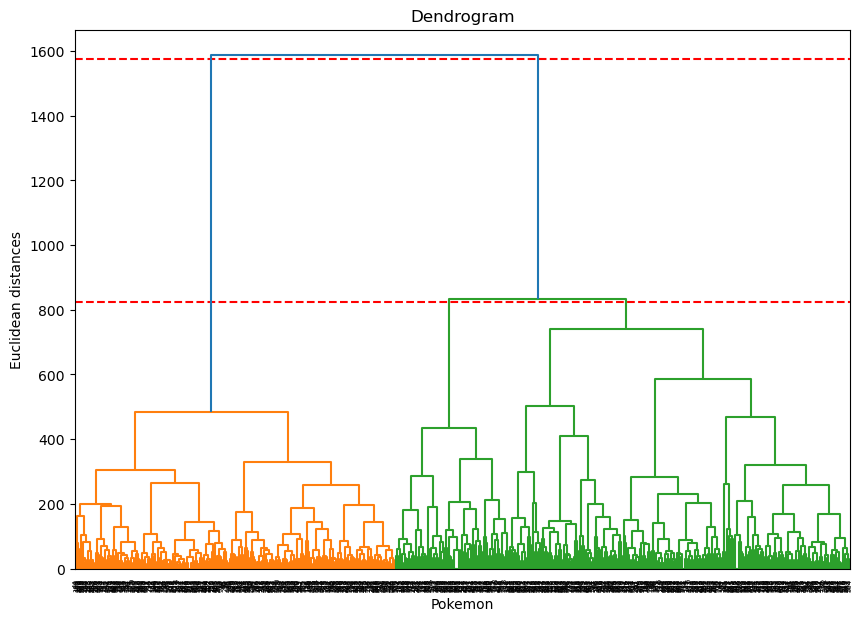

In [118]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))


To read a dendrogram to find the optimal number of clusters, find the section with the highest width. the number of lines (in this example the blue lines) intersecting the section is the optimal number of clusters. <font color = "red"> Can you tell how many clusters is the optimal amount?

2

After determining what the optimal number of clusters is, input it into the model implementation below!

In [122]:
# Put your optimal number of clusters here
optimal_number =2

# Implement model
agglo = AgglomerativeClustering(n_clusters= optimal_number, metric='euclidean', linkage='ward')

# Alternate implementation if you are using an older version that uses "affinity" and not "metric"
#agglo = AgglomerativeClustering(n_clusters= optimal_number, affinity='euclidean', linkage='ward')


Now lets fit and create some prediction to visualize the clusters!

In [124]:
y_agglo = agglo.fit_predict(X)

Now let's visualize! We will once again be using PCA to do so.

<Axes: xlabel='0', ylabel='1'>

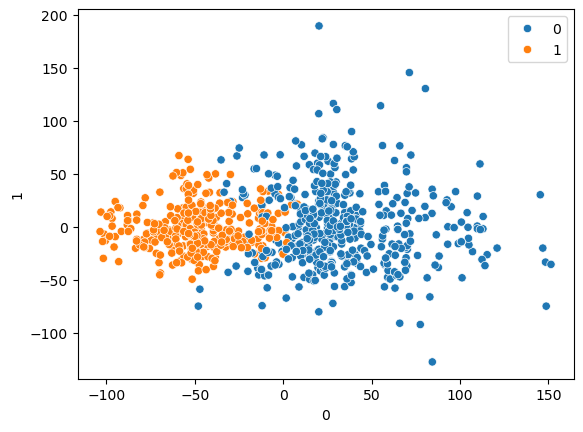

In [126]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

Now lets look again at K-Means visual again to compare

<Axes: xlabel='0', ylabel='1'>

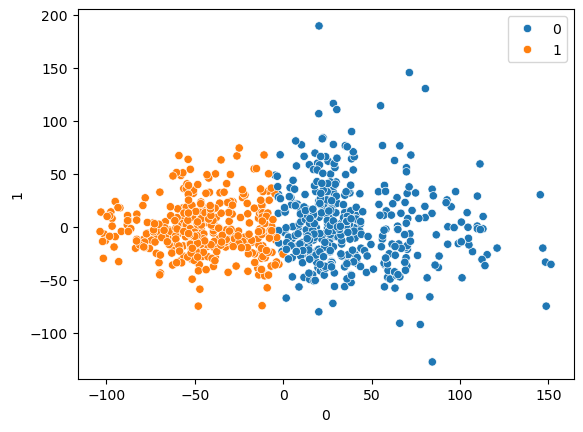

In [128]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<font color = "red"> Can you note any differences or similarities you may see?

The scatter plot shows two distinct clusters, one blue and one orange, separated with some overlap in the middle. The blue cluster is more spread out, meaning it has more variation, while the orange cluster is more compact. The overlap area suggests some similarities between points in both clusters. This clustering shows clear groups with some points in the middle that are harder to separate.

Lets also again look at some seperate features. Will be again looking at attack and defense just as we did with K-means!

<Axes: xlabel='Attack', ylabel='Defense'>

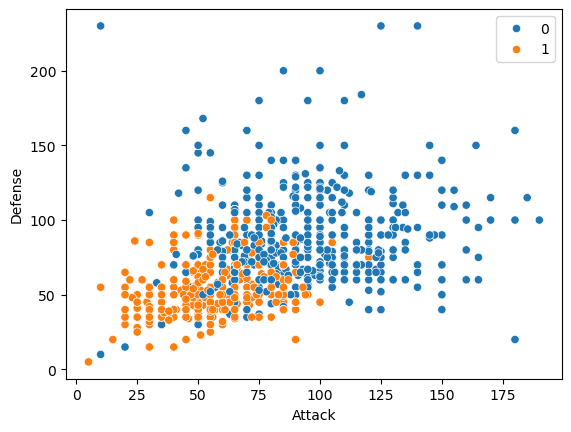

In [137]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y_agglo)

Once again, pulling up the K-means visual for quick comparison. <font color = "red"> Can you not any similarities or differences once again?

In this plot, the blue cluster generally has higher Attack and Defense values, while the orange cluster has lower values. There’s some overlap in the middle, but overall, blue points spread across higher ranges, and orange points are more concentrated in the lower ranges.

<Axes: xlabel='Attack', ylabel='Defense'>

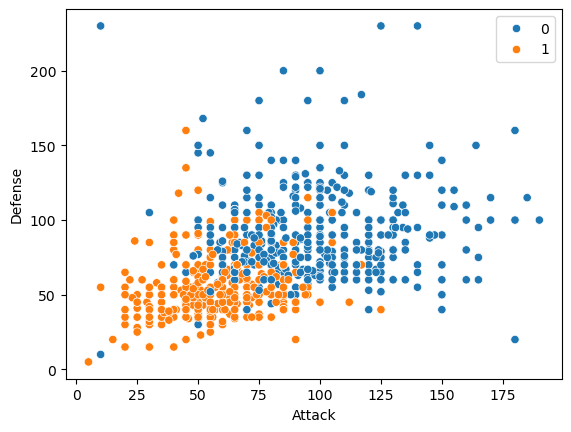

In [140]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y)

<font color = "red"> Make another plot of your choosing to get a better understanding of what the clusters may represent!


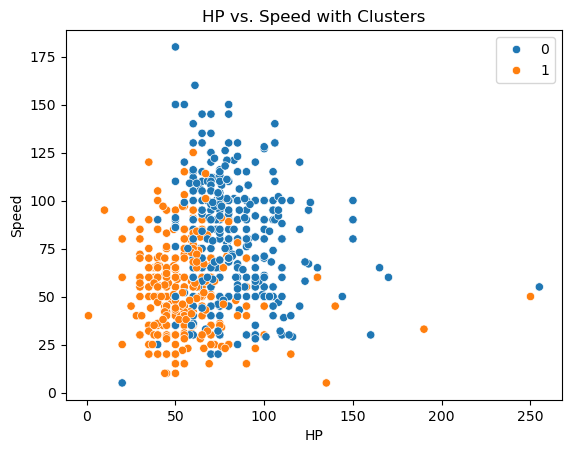

In [145]:
sns.scatterplot(x=df['HP'], y=df['Speed'], hue=y)
plt.xlabel('HP')
plt.ylabel('Speed')
plt.title('HP vs. Speed with Clusters')
plt.show()


Lets make an interactive scatterplot again! Remember to note that the x- and y-axis are our PCA values (from dimensionality reduction).
Below, we concat the dataframe along with the PCA values so that we can visualize properly. hover_data allows us to specify which columns we want to look at when hovering over each point.

In [148]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster (Agglomerative)'])
new_a_df = pd.concat([df, y_a_df], axis=1)

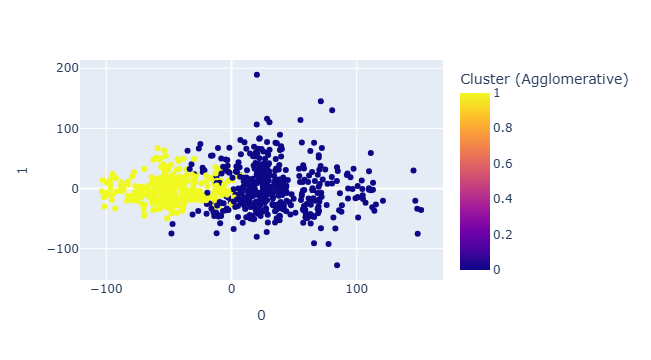

In [150]:
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1),
                 x = 0, y = 1, color='Cluster (Agglomerative)', hover_data=['Name','Type 1','Type 2','Legendary','Total'])
fig.show()

<hr>

<font color="red">In general, what can clustering teach us about data?</font>